# Método de clasificación automática para detección de apnea de sueño en sonidos de ronquidos 

Los métodos de clasificación automática son.... 

La apnea del sueño es...

Los datos generados para esta simulación ...

Algunas librerías de Python útiles para leer los datos contenidos en archivos de formato CSV y almacenarlos en arreglos son numpy y genfromtxt. Numpy es necesaria pues los datos se desean guardar en arreglos de tipo np.array. Genfromtxt se usa para leer la información de un archivo de texto.

In [4]:
import numpy as np
from numpy import genfromtxt

Los datos se leen y almacenan en arreglos de tipo np.array. El parámetro 'delimiter' hace referencia al carácter que separa a los datos, el parámetro 'skip header' se usa para que no se lea la primera fila de datos, la cual en este caso incluye los nombres de los datos y el parámetro 'dtype' se usa para indicar que se están leyendo datos de tipo string, pues de forma predeterminada se leen datos de tipo int. <br>

Las variables se almacenan de la siguiente forma: <br>
- La variable 'data_gen' contiene los datos generados que van a ser usados para el aprendizaje. <br>
- La variable 'cat_gen' contiene las categorías asignadas a los datos contenidos en 'data_gen' que serán usadas para el aprendizaje. <br>
- La variable 'data_try' contiene los datos generados que van a ser usados para la evaluación del sistema. <br>
- La variable 'cat_try' contiene las categorías asignadas a los datos contenidos en 'data_try' que serán usadas para la evaluación del desempeño de los algoritmos. <br>

In [5]:
data_gen = genfromtxt('DatosAprendizaje.csv', delimiter=',', skip_header = 1)
cat_gen = genfromtxt('CategoríasAprendizaje.csv', delimiter = ';', dtype=str)


data_try = genfromtxt('DatosPrueba.csv', delimiter=',', skip_header = 1)
cat_try = genfromtxt('CategoríasPrueba.csv', delimiter = ';', dtype=str)

### Bayes Ingenuo con distribución gaussiana

Este método es...

Para este método se usa la libreria GaussianNB de sklearn.naive_bayes. <br>

En la variable 'bayes' el algoritmo realiza el aprendizaje a partir de los datos y categorías proporcionados.<br>

En la variable 'pred1' se almacenan las predicciones realizadas por el método de clasificación automática.

In [6]:
from sklearn.naive_bayes import GaussianNB
bayes = GaussianNB()
bayes.fit(data_gen, cat_gen)
pred1 = []
pred1 = bayes.predict(data_try)   

Para evaular rápidamente el desempeño del algoritmo, se crea el contador 'n', el cual va a contar la cantidad de predicciones correctas realizadas por el método de clasificación automática.

In [162]:
n = 0
for i in range(len(cat_try)): 
    if cat_try[i-1] == pred1[i-1]:
        n = n + 1     
print(n) # n= 22 :) 

22
13
9


Se obtienen 22 predicciones correctas. <br>

Esto corresponde a un desempeño muy aceptable para un método de clasificación automática.

### kNN 

Este método es...

Para este método se usa la libreria KNeighborsClassifier de sklearn.neighbors. <br>

En la variable 'vecinos' el algoritmo realiza el aprendizaje a partir de los datos y categorías proporcionados.<br>

El párametro 'n_neighbors' corresponde al número de vecinos que se tomarán en cuenta para el aprendizaje de las categorías y la posterior clasificación automática. En este caso, se usan 18 pues se encontró que es el valor óptimo, sin embargo, se pueden probar otros valores para observar el cambio en el desempeño.

In [8]:
from sklearn.neighbors import KNeighborsClassifier

vecinos = KNeighborsClassifier(n_neighbors=18)
vecinos = vecinos.fit(data_gen, cat_gen)

En la variable 'pred2' el método de clasificación automática almacena las predicciones realizadas para las categorías de los datos de prueba.

In [9]:
pred2 = []
pred2 = vecinos.predict(data_try)

Para evaular rápidamente el desempeño del algoritmo, se crea el contador 'd', el cual va a contar la cantidad de predicciones correctas realizadas por el método de clasificación automática.

In [10]:
d = 0
for i in range(len(cat_try)): 
    if cat_try[i-1] == pred2[i-1]:
        d = d + 1     
print(d) # n= 23 :D 

23


Se obtienen 23 predicciones correctas. <br>

Esto corresponde a un desempeño muy aceptable para un método de clasificación automática.

### Árbol de decisión 

In [131]:
from sklearn import tree

In [156]:
arbol = tree.DecisionTreeClassifier()
arbol = arbol.fit(data_gen,cat_gen)

In [157]:
pred3 = arbol.predict(data_try)

In [160]:
m = 0
for i in range(len(cat_try)): 
    if cat_try[i-1] == pred3[i-1]:
        m = m + 1 
            
print(m) # n= 22 :) 

22


Se obtienen 22 predicciones correctas.

Esto corresponde a un desempeño muy aceptable para un método de clasificación automática.

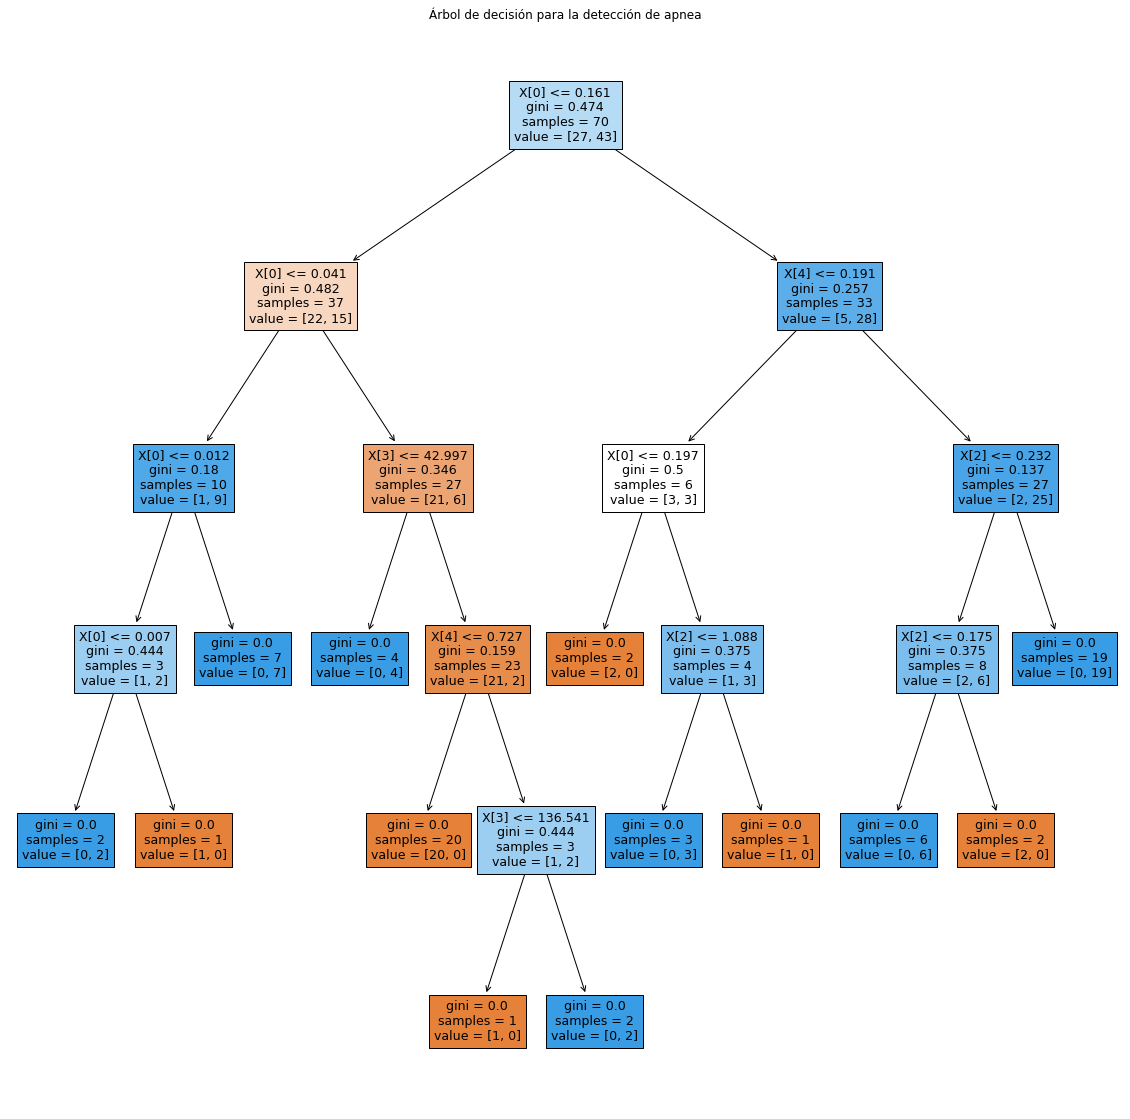

In [41]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
tree.plot_tree(arbol, filled=True)
plt.title("Árbol de decisión para la detección de apnea")
plt.show() 

### Máquina de soporte vectorial 

In [16]:
from sklearn import svm

In [17]:
vector = svm.NuSVC(kernel='linear', gamma='auto')
vector = vector.fit(data_gen, cat_gen)

In [18]:
pred4 = []
pred4 = vector.predict(data_try)

In [19]:
q = 0
for i in range(len(cat_try)): 
    if cat_try[i-1] == pred4[i-1]:
        q = q + 1     
print(q) # n= 23 :D

23


Se obtienen 23 predicciones correctas.

Esto corresponde a un desempeño muy aceptable para un método de clasificación automática.

### Regresión Logística 

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
regresion = LogisticRegression(random_state=0, solver='liblinear', C=0.7).fit(data_gen, cat_gen)

In [22]:
pred5 = []
pred5 = regresion.predict(data_try)

In [23]:
f = 0
for i in range(len(cat_try)): 
    if cat_try[i-1] == pred5[i-1]:
        f = f + 1     
print(f) # n= 20 :)

20


Se obtienen 20 predicciones correctas.

Esto corresponde a un desempeño aceptable para un método de clasificación automática.

## Métodos de evaluación de métodos de clasificación automática

Los métodos de evaluación son...

### Reporte de clasificación

El reporte de clasificación se obtiene usando la instrucción '*sklearn.metrics.classification_report*'. <br>

Con esta instrucción...

In [48]:
from sklearn.metrics import classification_report

##### Bayes ingenuo con distribución gaussiana

Para este caso...

In [31]:
 print(classification_report(cat_try, pred1))

              precision    recall  f1-score   support

       Apnea       0.69      0.69      0.69        13
    No apnea       0.76      0.76      0.76        17

    accuracy                           0.73        30
   macro avg       0.73      0.73      0.73        30
weighted avg       0.73      0.73      0.73        30



#### kNN

Para este caso...

In [32]:
 print(classification_report(cat_try, pred2))

              precision    recall  f1-score   support

       Apnea       0.71      0.77      0.74        13
    No apnea       0.81      0.76      0.79        17

    accuracy                           0.77        30
   macro avg       0.76      0.77      0.76        30
weighted avg       0.77      0.77      0.77        30



#### Árbol de decisión

Para este caso...

In [42]:
 print(classification_report(cat_try, pred3))

              precision    recall  f1-score   support

       Apnea       0.67      0.77      0.71        13
    No apnea       0.80      0.71      0.75        17

    accuracy                           0.73        30
   macro avg       0.73      0.74      0.73        30
weighted avg       0.74      0.73      0.73        30



#### Máquina de soporte vectorial

Para este caso...

In [43]:
 print(classification_report(cat_try, pred4))

              precision    recall  f1-score   support

       Apnea       0.80      0.62      0.70        13
    No apnea       0.75      0.88      0.81        17

    accuracy                           0.77        30
   macro avg       0.78      0.75      0.75        30
weighted avg       0.77      0.77      0.76        30



#### Regresión logística

Para este caso....

In [44]:
 print(classification_report(cat_try, pred5))

              precision    recall  f1-score   support

       Apnea       0.80      0.31      0.44        13
    No apnea       0.64      0.94      0.76        17

    accuracy                           0.67        30
   macro avg       0.72      0.62      0.60        30
weighted avg       0.71      0.67      0.62        30



### Curvas ROC

Las curvas...

In [75]:
from sklearn.metrics import roc_auc_score

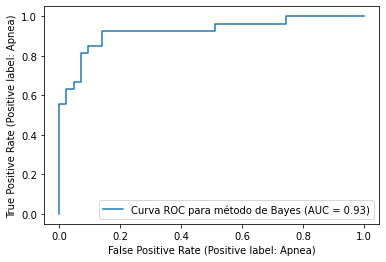

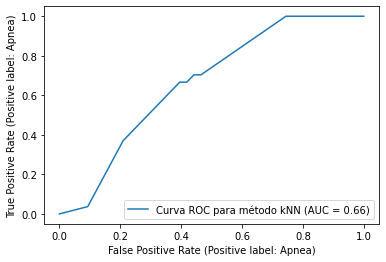

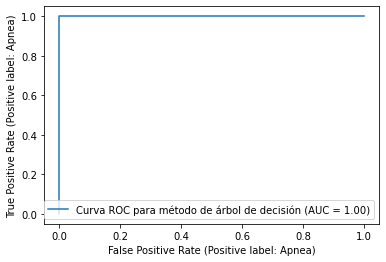

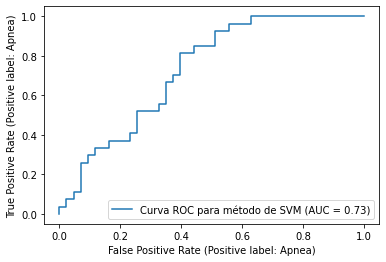

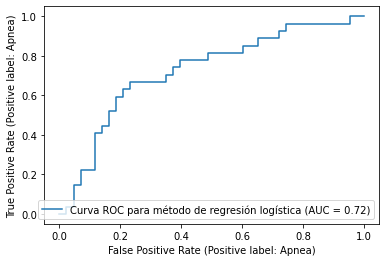

In [163]:
# Para método de Bayes
metrics.plot_roc_curve(bayes, data_gen, cat_gen, pos_label="Apnea", name="Curva ROC para método de Bayes")  
plt.show()

# Para método kNN
metrics.plot_roc_curve(vecinos, data_gen, cat_gen, pos_label="Apnea", name="Curva ROC para método kNN")  
plt.show()

# Para método de árbol de decisión
metrics.plot_roc_curve(arbol, data_gen, cat_gen, pos_label="Apnea", name="Curva ROC para método de árbol de decisión")  
plt.show()

# Para método de máquina de soporte vectorial (SVM)
metrics.plot_roc_curve(vector, data_gen, cat_gen, pos_label="Apnea", name="Curva ROC para método de SVM")  
plt.show()

# Para método de regresión logística
metrics.plot_roc_curve(regresion, data_gen, cat_gen, pos_label="Apnea", name="Curva ROC para método de regresión logística")  
plt.show()

Se observa que....